In [7]:
import tensorflow as tf
from keras.utils.layer_utils import count_params
model = tf.keras.models.load_model('./models/{}/{}.h5'.format('R2UNet', 'R2UNet'), compile=False)
trainable_count = count_params(model.trainable_weights)

In [8]:
trainable_count

10050241

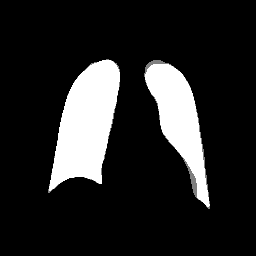

In [3]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2


def overlapMask(model_name):
    # Get Array Image =
    image_to_predict = img_to_array(load_img('./sample_images/image_to_predict.bmp', color_mode='grayscale', target_size=(256, 256))).astype('float32')/255.0
    gt_image = np.squeeze(img_to_array(load_img('./sample_images/ground_truth.bmp', color_mode='grayscale', target_size=(256, 256))).astype('float32'))/255.0
    # Reshape to model.predict
    image_arr_reshape = image_to_predict[np.newaxis, ...]
    # Load Model
    model = tf.keras.models.load_model('./models/{}/{}.h5'.format(model_name, model_name), compile=False)
    # Get Segmentation (Predicted Images)
    mask_arr = model.predict(image_arr_reshape, verbose=0)
    # To Binary
    gt_image = (gt_image > 0.5).astype('float32')
    mask_arr = (mask_arr > 0.5).astype('float32')
    # Reduce The Dimension
    mask_arr = np.squeeze(mask_arr)
    # Overlap
    gt_image[gt_image != mask_arr] = 0.5
    return array_to_img(np.expand_dims(gt_image, axis=2))

overlapMask('UNet')


In [5]:
import plotly.express as px
import pandas as pd

# Data
data = {
    'No': [1, 2, 3, 4],
    'Model': ['UNet', 'AttUNet', 'UNet++', 'R2UNet'],
    'IoU': [0.936, 0.928, 0.936, 0.915],
    'Time': [7.73, 6.563, 11.973, 11.837],
    'Param': [7851969, 8202053, 9162753, 10050241]
}

df = pd.DataFrame(data)

# Plotting
df_sorted = df.sort_values(by='IoU')
fig = px.scatter(df_sorted, x='Model', y='IoU', size='Time', color='Param',
                 hover_data=['Time', 'Param'], title='Model Evaluation')

# Customize the plot
fig.update_layout(
    xaxis=dict(title='Model'),
    yaxis=dict(title='IoU'),
    coloraxis=dict(colorbar=dict(title='Param')),
)

# Show the plot
fig.show()


In [9]:
import plotly.express as px
import pandas as pd

# Data
data = {
    'No': [1, 2, 3, 4],
    'Model': ['UNet', 'AttUNet', 'UNet++', 'R2UNet'],
    'IoU': [0.936, 0.928, 0.936, 0.915],
    'Time': [7.73, 6.563, 11.973, 11.837],
    'Param': [7851969, 8202053, 9162753, 10050241]
}

df = pd.DataFrame(data)



